In [1]:
import random
import numpy
from scipy.stats import t,norm
import matplotlib.pyplot as plt
import numpy as np

### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

<b>Step-1:- Determining the hypothesis</b><br>
Null Hypothesis(H<sub>0</sub>) - Average mileage of SUV is >= 15 km/L.<br>
Alternate Hypothesis(H<sub>1</sub>) - Average mileage of SUV is < 15 km/L.

<b>Step-2:- Sample Collection</b><br>
Collect sample of size n=20 eg:-[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]<br>
Calculate mean of the sample:- 15.1

<b>Step-3:-Compute test statistic</b>

$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

<b>Step-4:-Decide significance level</b>
<br>

<b>Step-5:-Apply decision rule</b><br>
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

<b>Step-6:- Compute p-value $ P(Test \ Statistics | H_0) $</b><br>
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [2]:
sample = np.random.uniform(13.5, 17.00, 20).round(2)
print(sample)

[14.59 16.04 13.54 14.64 14.19 16.45 13.82 14.87 13.63 14.97 14.6  16.89
 15.92 16.32 13.66 14.62 15.45 15.94 15.13 16.97]


In [3]:
print(sample.mean())

15.112


In [4]:
confidence = 0.95
alpha = 1-confidence
t_critical = t.ppf(1 - alpha/2,df=19)
print(t_critical)

2.093024054408263


In [5]:
sample_size = 20
sample_mean = sample.mean()
pop_mean = 15
pop_std = sample.std()

In [6]:
def t_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

t = t_score(sample_size, sample_mean, pop_mean, pop_std)

print(t)

0.4717041942731521


Text(15.112, 0.0007, 'x_bar')

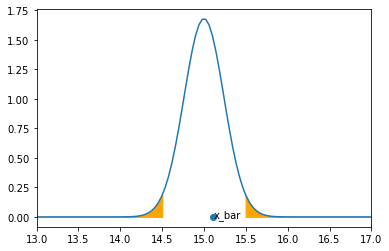

In [7]:
x_min = 13
x_max = 17


mean = pop_mean
std = pop_std / sample_size**0.5


x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [8]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [9]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.6371379429333992
Fail to reject Null Hypothesis


#### Null hypothesis i.e "Average mileage of SUV is >= 15" is accepted.So it is concluded that average mileage of SUV is greater than or equal to 15.

<hr style="height:1px">